<a href="https://colab.research.google.com/github/Aliahmadjangohar/Aliahmadjangohar/blob/main/Copy_of_EDA_ON_RETAIL_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the task "EDA on retail data" of online sale



In [1]:
# Importing necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style for Matplotlib
plt.style.use('seaborn-whitegrid')

# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Set the maximum number of rows and columns to display in Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')


<ipython-input-1-f675b826cd2f>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Data Loading
  load the dataset from kaggle directly through link or upload the dataset.

In [5]:
from google.colab import files

# Upload the retail data file
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail (1).xlsx


In [12]:
# the file name is "Online Retail.xlsx"

file_name = "Online Retail (1).xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_name)

# Display the first few rows of the DataFrame
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# DATA CLEANING

In [14]:

# Replace NaN values with appropriate methods
df.fillna({'CustomerID': -1}, inplace=True)  # Assuming -1 is a placeholder for missing CustomerID
df.dropna(inplace=True)  # Drop rows with other missing values

# Convert data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle outliers (example: removing rows with negative Quantity)
df = df[df['Quantity'] > 0]

# Text cleaning (example: converting Description to lowercase)
df['Description'] = df['Description'].str.lower()

# Display the cleaned DataFrame
print(df.head())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


#  Explore basic statistics

In [15]:

# Summary statistics
df.describe()


,Quantity,UnitPrice,CustomerID
count,525462.000000,525462.000000,525462.000000
mean,10.681024,3.876109,11425.849904
std,157.399272,42.040021,6806.164327
min,1.000000,-11062.060000,-1.000000
25%,1.000000,1.250000,-1.000000
50%,4.000000,2.080000,14341.000000
75%,11.000000,4.130000,16244.000000
max,80995.000000,13541.330000,18287.000000


from matplotlib import pyplot as plt
_df_0['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Quantity', y='UnitPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='UnitPrice', y='CustomerID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

# Perform data visualization.

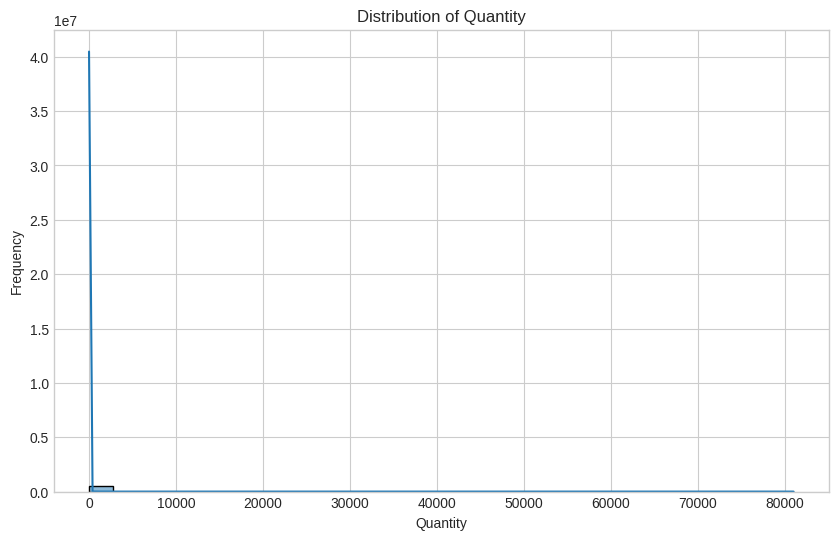

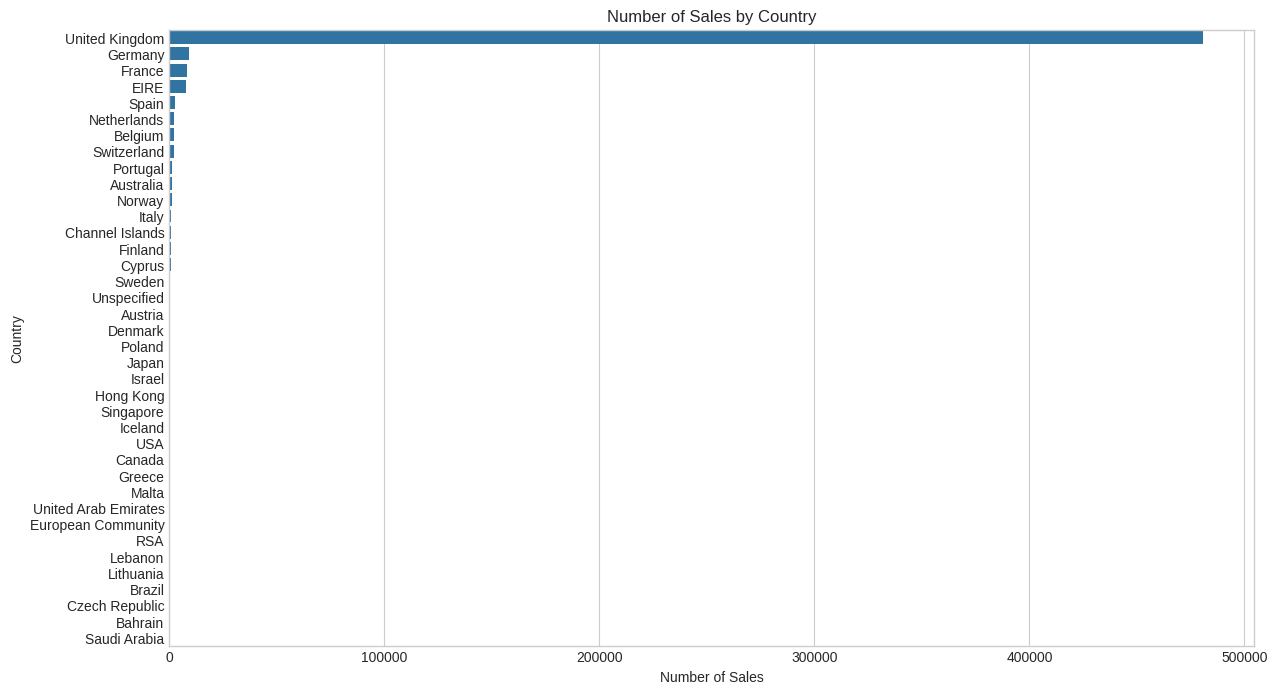

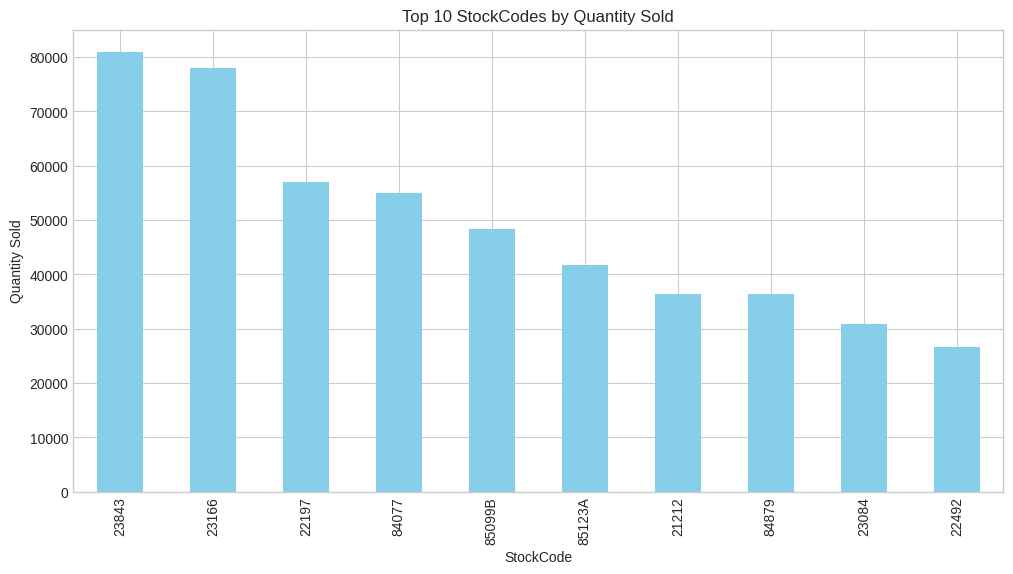

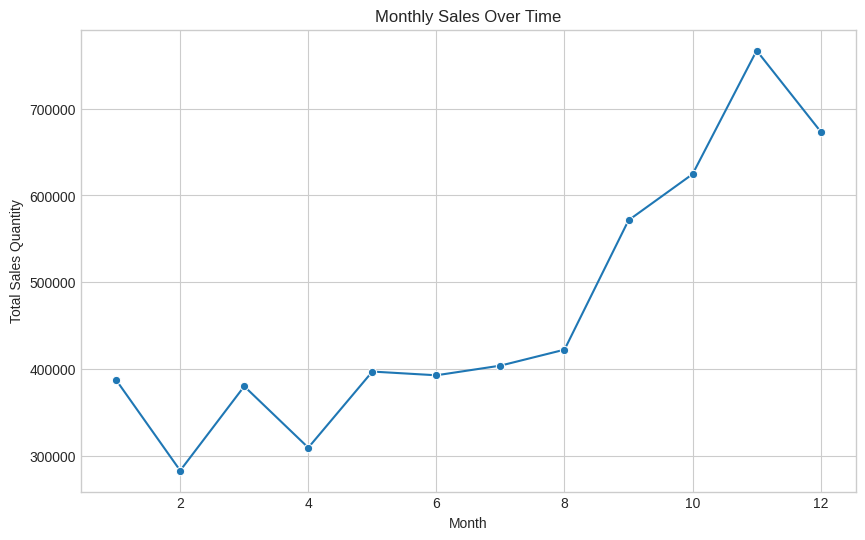

In [17]:
# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Sales by Country
plt.figure(figsize=(14, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of Sales by Country')
plt.xlabel('Number of Sales')
plt.ylabel('Country')
plt.show()

# Top 10 StockCodes by Quantity Sold
top_stockcodes = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_stockcodes.plot(kind='bar', color='skyblue')
plt.title('Top 10 StockCodes by Quantity Sold')
plt.xlabel('StockCode')
plt.ylabel('Quantity Sold')
plt.show()

# Monthly Sales Over Time
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.show()


# Analyze sales trends over time.

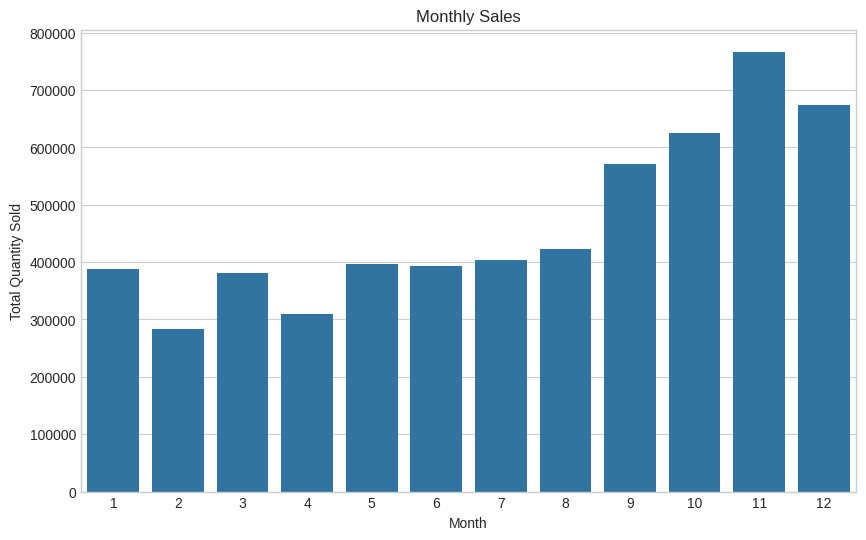

In [18]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and day of the week
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Monthly sales
monthly_sales = df.groupby('Month')['Quantity'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


# Task 6: Explore top-selling products and countries.

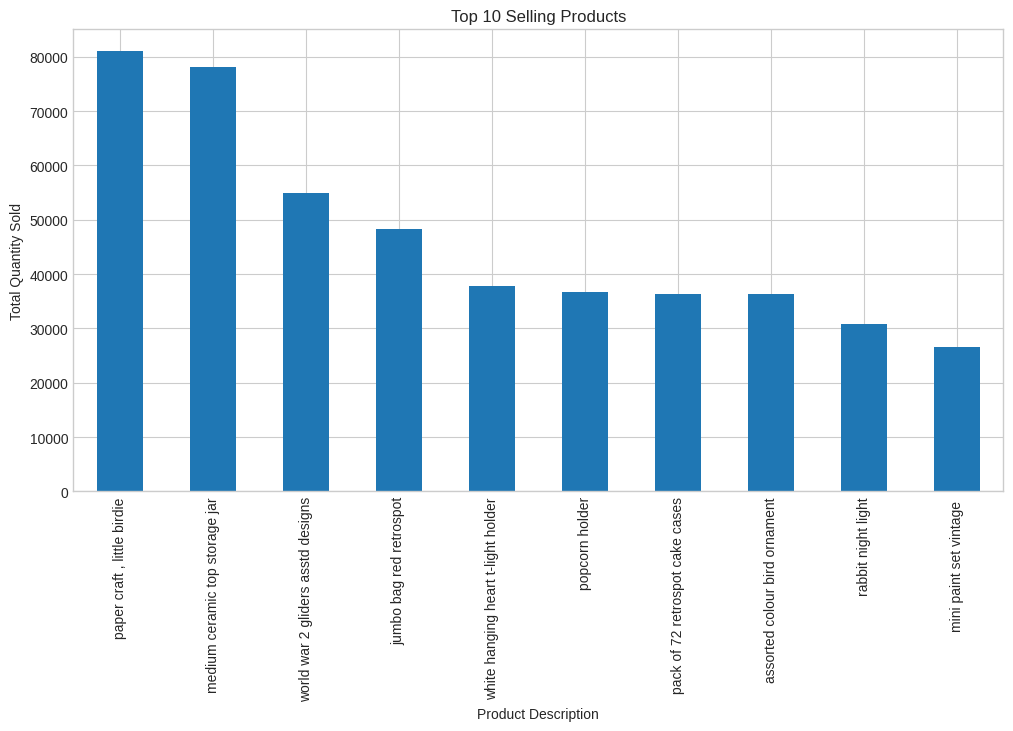

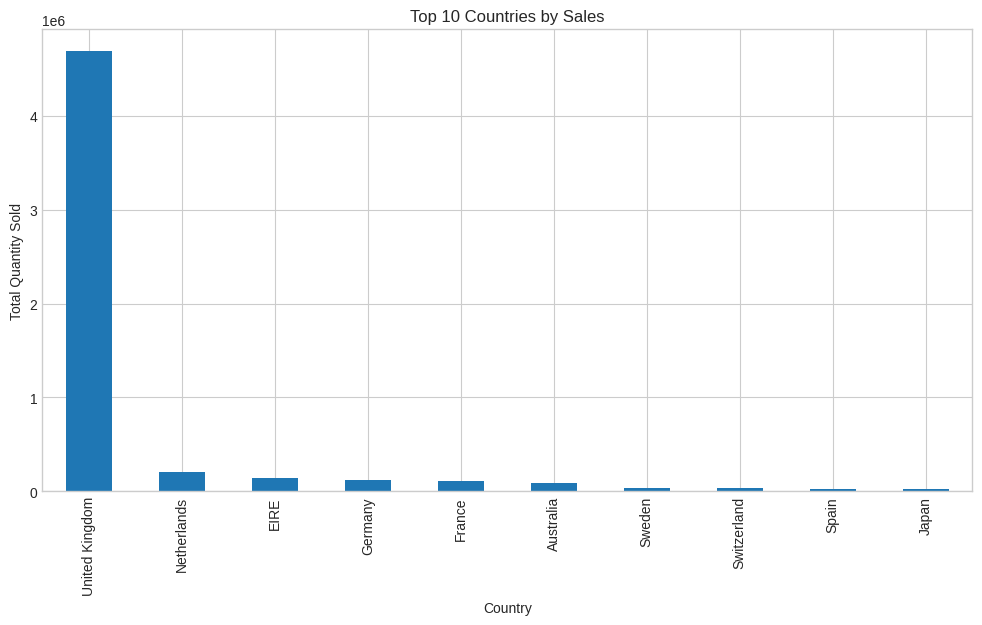

In [19]:
# Top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()

# Top countries based on quantity sold
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.show()



Task 7: Identify outliers.

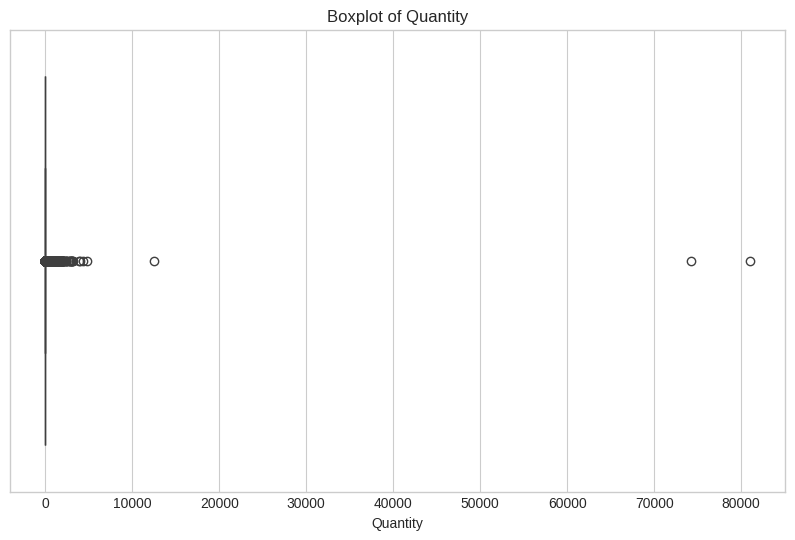

In [20]:
# Example: Boxplot of Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()


# Draw conclusions and summarize findings.

# Report
**Sales Analysis Summary:**
The analysis of the retail dataset reveals a consistent upward sales trend for the first 11 months, followed by a slight decline in the twelfth month. This dip may be influenced by seasonal or year-end factors, warranting further investigation. Notably, the United Kingdom emerges as the top-performing country, contributing the highest quantity of items sold. Key visualizations, including the distribution of quantity, sales by country, and monthly sales over time, provide insights for strategic decision-making. Tailoring marketing strategies to capitalize on the strong market presence in the United Kingdom and exploring the cause behind the year-end dip can enhance future business planning.

